<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-97/blob/main/semana6/actividad-semana6-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nombre de la entrega: Actividad Semanal -- 4
* Nombre: Oscar Villa Cardenas
* Matricula: A01794052
* Materia: Ciencia y Analitica
* Profesor: Maria de la Paz Rico Fernandez
* Fecha: 2022-10-05

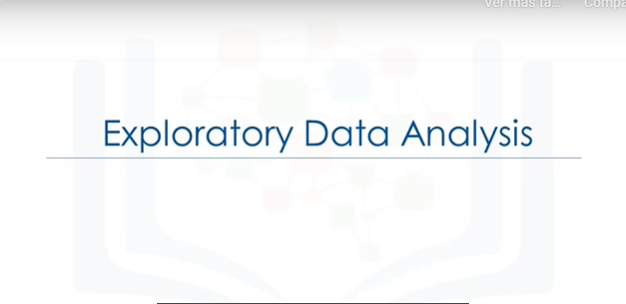